In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
'''
# 파일 unzip
path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/garbage_classification_real.zip'
directory_to_extract_to = '/content/drive/MyDrive/Colab Notebooks/input'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
'''

"\n# 파일 unzip\npath_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/garbage_classification_real.zip'\ndirectory_to_extract_to = '/content/drive/MyDrive/Colab Notebooks/input'\n\nimport zipfile\nwith zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:\n    zip_ref.extractall(directory_to_extract_to)\n"

In [ ]:
def list_dataset():
    for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/input/garbage_classification_real'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# Add class name prefix to each path based on class name include in filename
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df


def class_id_to_label(id):
    label_map = {1: 'glass', 2: 'paper', 3: 'cardboard', 4: 'plastic', 5: 'metal', 6: 'trash'}
    return label_map[id]


In [ ]:
IMAGES_DIR = "/content/drive/MyDrive/Colab Notebooks/input/garbage_classification_real/"

train_file = '/content/drive/MyDrive/Colab Notebooks/input/one-indexed-files-notrash_train.txt'
val_file   = '/content/drive/MyDrive/Colab Notebooks/input/one-indexed-files-notrash_val.txt'
test_file  = '/content/drive/MyDrive/Colab Notebooks/input/one-indexed-files-notrash_test.txt'

df_train = pd.read_csv(train_file, sep=' ', header=None, names=['filename', 'category'])
df_valid = pd.read_csv(val_file,   sep=' ', header=None, names=['filename', 'category'])
df_test  = pd.read_csv(test_file,   sep=' ', header=None, names=['filename', 'category'])

df_train = add_class_name_prefix(df_train, 'filename')
df_valid = add_class_name_prefix(df_valid, 'filename')
df_test  = add_class_name_prefix(df_test,  'filename')

df_train['category_str'] = df_train['category'].apply(class_id_to_label)
df_valid['category_str'] = df_valid['category'].apply(class_id_to_label)
df_test['category_str']  = df_test['category'].apply(class_id_to_label)

df_train['category'] = df_train['category']-1
df_valid['category'] = df_valid['category']-1
df_test['category']  = df_test['category']-1

print(f'Found {len(df_train)} training, {len(df_valid)} validation and {len(df_test)} test.')

Found 1768 training, 328 validation and 431 test.


In [ ]:
df_test

,filename,category,category_str
0,paper/paper70.jpg,1,paper
1,paper/paper380.jpg,1,paper
2,cardboard/cardboard31.jpg,2,cardboard
3,glass/glass12.jpg,0,glass
4,paper/paper169.jpg,1,paper
...,...,...,...
426,metal/metal389.jpg,4,metal
427,paper/paper303.jpg,1,paper
428,paper/paper405.jpg,1,paper
429,paper/paper465.jpg,1,paper


In [ ]:
# 이미지 데이터를 로드하기 위한 ImageDataGenerator 객체 생성
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.2,
    height_shift_range=0.2

)

# 이미지 데이터를 로드하고 증강 작업을 수행하는 함수
def augment_images(dataframe,  save_directory):
    for i in range(len(dataframe['filename'])):
        # 이미지 파일의 클래스/레이블 추출
        path = os.path.join(IMAGES_DIR + dataframe['filename'][i])
        label = os.path.basename(os.path.dirname(path))
        # label = dataframe['rel_path']

        # 이미지 파일 로드
        image = load_img(path)
        image_array = img_to_array(image)

        # 이미지 증강을 위해 배열 형태로 변환
        image_array = image_array.reshape((1,) + image_array.shape)

        # 증강된 이미지 저장 경로 생성
        class_directory = os.path.join(save_directory, label)
        os.makedirs(class_directory, exist_ok=True)

        # 이미지 증강 수행 및 저장
        i = 0
        for batch in datagen.flow(image_array, save_to_dir=class_directory, save_prefix=label, save_format='jpg'):
            i += 1
            if i >= 1:  # 증강할 이미지 수 지정
                break

        # 원본 이미지 저장
        image.save(os.path.join(class_directory, os.path.basename(path)))



In [ ]:
# train dataset 이미지 증강 수행 및 저장
save_directory = '/content/drive/MyDrive/Colab Notebooks/input/augmentation_data/train'

# 실제로는 밑에꺼 주석 풀고 돌려야 함.
# augment_images(df_train, save_directory)

In [ ]:
'''
# Creating a dictionary from 6 classes
categories={}
i=-1
for dirname, _, filenames in os.walk(save_directory):
    for filename in filenames:
        categories[i] = dirname.split('/')[-1]
        break
#         print(os.path.join(dirname, filename))
    i += 1
print(categories)
'''


"\n# Creating a dictionary from 6 classes\ncategories={}\ni=-1\nfor dirname, _, filenames in os.walk(save_directory):\n    for filename in filenames:\n        categories[i] = dirname.split('/')[-1]\n        break\n#         print(os.path.join(dirname, filename))\n    i += 1\nprint(categories)\n"

In [ ]:
# Add class name prefix to filename. So for example "/paper104.jpg" become "paper/paper104.jpg"

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# train dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

label_map = {0: 'glass', 1: 'paper', 2: 'cardboard', 3: 'plastic', 4: 'metal', 5: 'trash'}

for category in label_map:
    filenames = os.listdir('/content/drive/MyDrive/Colab Notebooks/input/augmentation_data/train/' + label_map[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_train_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

'''
for category in categories:
    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/train/' + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_train_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})
'''
df_train_new = add_class_name_prefix(df_train_new, 'filename')

In [ ]:
df_train_new

,filename,category
0,glass_/glass_0_8538.jpg,0
1,glass/glass189.jpg,0
2,glass_/glass_0_5104.jpg,0
3,glass/glass325.jpg,0
4,glass_/glass_0_50.jpg,0
...,...,...
3499,trash/trash58.jpg,5
3500,trash_/trash_0_9522.jpg,5
3501,trash/trash74.jpg,5
3502,trash_/trash_0_3349.jpg,5


In [ ]:
def remove_underscore_before_slash(string):
    return string.replace('_/', '/')

df_train_new_list = []
for i in range(len(df_train_new['filename'])):
  if '_' in df_train_new['filename'][i]:
    df_train_new_list.append(remove_underscore_before_slash(df_train_new['filename'][i]))

  else:
    df_train_new_list.append(df_train_new['filename'][i])

df_train_new['filename'] = df_train_new_list

In [ ]:
df_train_new

,filename,category
0,glass/glass_0_8538.jpg,0
1,glass/glass189.jpg,0
2,glass/glass_0_5104.jpg,0
3,glass/glass325.jpg,0
4,glass/glass_0_50.jpg,0
...,...,...
3499,trash/trash58.jpg,5
3500,trash/trash_0_9522.jpg,5
3501,trash/trash74.jpg,5
3502,trash/trash_0_3349.jpg,5


In [ ]:
'''
# valid dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(IMAGES_DIR + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_valid_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df_valid_new = add_class_name_prefix(df_valid_new, 'filename')
'''

"\n# valid dataset\n\n# list conatining all the filenames in the dataset\nfilenames_list = []\n# list to store the corresponding category, note that each folder of the dataset has one class of data\ncategories_list = []\n\nfor category in categories:\n    filenames = os.listdir(IMAGES_DIR + categories[category])\n    filenames_list = filenames_list  + filenames\n    categories_list = categories_list + [category] * len(filenames)\n    \ndf_valid_new = pd.DataFrame({\n    'filename': filenames_list,\n    'category': categories_list\n})\n\ndf_valid_new = add_class_name_prefix(df_valid_new, 'filename')\n"

In [ ]:
'''
df_valid_new_list = []
for i in range(len(df_valid_new['filename'])):
  if '_' in df_valid_new['filename'][i]:
    df_valid_new_list.append(remove_underscore_before_slash(df_valid_new['filename'][i]))

  else:
    df_valid_new_list.append(df_valid_new['filename'][i])

df_valid_new['filename'] = df_valid_new_list
'''

"\ndf_valid_new_list = []\nfor i in range(len(df_valid_new['filename'])):\n  if '_' in df_valid_new['filename'][i]:\n    df_valid_new_list.append(remove_underscore_before_slash(df_valid_new['filename'][i]))\n    \n  else: \n    df_valid_new_list.append(df_valid_new['filename'][i])\n\ndf_valid_new['filename'] = df_valid_new_list\n"

In [ ]:
'''
# test dataset

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/test/' + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)

df_test_new = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df_test_new = add_class_name_prefix(df_test_new, 'filename')
'''

"\n# test dataset\n\n# list conatining all the filenames in the dataset\nfilenames_list = []\n# list to store the corresponding category, note that each folder of the dataset has one class of data\ncategories_list = []\n\nfor category in categories:\n    filenames = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/test/' + categories[category])\n    filenames_list = filenames_list  + filenames\n    categories_list = categories_list + [category] * len(filenames)\n    \ndf_test_new = pd.DataFrame({\n    'filename': filenames_list,\n    'category': categories_list\n})\n\ndf_test_new = add_class_name_prefix(df_test_new, 'filename')\n"

In [ ]:
'''
df_test_new_list = []
for i in range(len(df_test_new['filename'])):
  if '_' in df_test_new['filename'][i]:
    df_test_new_list.append(remove_underscore_before_slash(df_test_new['filename'][i]))

  else:
    df_test_new_list.append(df_test_new['filename'][i])

df_test_new['filename'] = df_test_new_list
'''

"\ndf_test_new_list = []\nfor i in range(len(df_test_new['filename'])):\n  if '_' in df_test_new['filename'][i]:\n    df_test_new_list.append(remove_underscore_before_slash(df_test_new['filename'][i]))\n    \n  else: \n    df_test_new_list.append(df_test_new['filename'][i])\n\ndf_test_new['filename'] = df_test_new_list\n"

In [ ]:
print(f'Found {len(df_train_new)} train, {len(df_valid)} validation and {len(df_test)} test.')

Found 3504 train, 328 validation and 431 test.


In [ ]:
import pandas as pd
df_test.sort_values('category')

,filename,category,category_str
314,glass/glass148.jpg,0,glass
280,glass/glass139.jpg,0,glass
137,glass/glass297.jpg,0,glass
288,glass/glass426.jpg,0,glass
133,glass/glass59.jpg,0,glass
...,...,...,...
366,trash/trash109.jpg,5,trash
55,trash/trash29.jpg,5,trash
42,trash/trash46.jpg,5,trash
309,trash/trash93.jpg,5,trash


In [ ]:
# 데이터셋 순서 섞기

def df_suffled(df):
  return(df.sample(frac=1).reset_index(drop=True))

df_train_new = df_suffled(df_train_new)
df_valid = df_suffled(df_valid)
df_test = df_suffled(df_test)

In [ ]:
df_train_new = df_train_new[0:2200]
df_train_new

,filename,category
0,glass/glass198.jpg,0
1,glass/glass186.jpg,0
2,trash/trash30.jpg,5
3,cardboard/cardboard378.jpg,2
4,glass/glass124.jpg,0
...,...,...
2195,glass/glass141.jpg,0
2196,cardboard/cardboard_0_674.jpg,2
2197,cardboard/cardboard243.jpg,2
2198,metal/metal_0_603.jpg,4


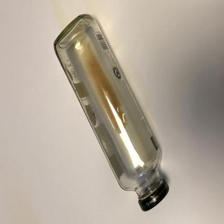

In [ ]:
# X dataset 생성: image를 array 형식으로 만들기
# X_train, X_valid, X_test

from tensorflow.python.ops.math_ops import Xdivy
import numpy as np
from PIL import Image

# X_train
X_train = []
for i in range(len(df_train_new['filename'])):
  path = os.path.join('/content/drive/MyDrive/Colab Notebooks/input/augmentation_data/train/' + df_train_new['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_train.append(x)

img_2 = Image.fromarray(X_train[0]) # NumPy array to PIL image
img_2.show()

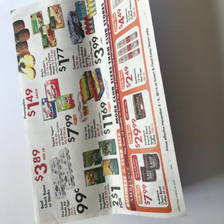

In [ ]:
# X_valid
X_valid = []
for i in range(len(df_valid['filename'])):
  path = os.path.join(IMAGES_DIR + df_valid['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_valid.append(x)

img_2 = Image.fromarray(X_valid[0]) # NumPy array to PIL image
img_2.show()

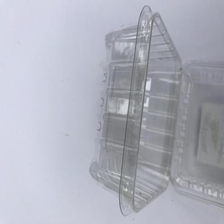

In [ ]:
# X_test
X_test = []
for i in range(len(df_test['filename'])):
  path = os.path.join(IMAGES_DIR + df_test['filename'][i])
  img = Image.open(path)
  img = img.resize((224,224),Image.ANTIALIAS)
  x = np.array(img)

  X_test.append(x)

img_2 = Image.fromarray(X_test[0]) # NumPy array to PIL image
img_2.show()

In [ ]:
# Y dataset 생성
# Y_train, Y_valid, Y_test

# Y_train
Y_train = []
for i in range(len(df_train_new['filename'])):
  Y_train.append(df_train_new['category'][i])

print(Y_train)
print(len(Y_train))

# Y_valid
Y_valid = []
for i in range(len(df_valid['filename'])):
  Y_valid.append(df_valid['category'][i])

print(Y_valid)
print(len(Y_valid))

# Y_test
Y_test = []
for i in range(len(df_test['filename'])):
  Y_test.append(df_test['category'][i])

print(Y_test)
print(len(Y_test))


[0, 0, 5, 2, 0, 4, 3, 1, 4, 4, 4, 3, 2, 1, 3, 0, 3, 3, 0, 1, 1, 5, 1, 2, 5, 0, 0, 1, 5, 2, 2, 2, 1, 1, 2, 1, 2, 3, 3, 0, 0, 2, 2, 1, 3, 5, 4, 0, 3, 1, 4, 4, 2, 1, 4, 3, 4, 0, 0, 4, 0, 2, 3, 4, 2, 2, 0, 2, 1, 2, 1, 5, 0, 1, 1, 4, 3, 3, 0, 0, 1, 2, 0, 0, 3, 5, 5, 1, 2, 3, 4, 0, 4, 1, 1, 0, 0, 4, 1, 1, 1, 1, 4, 0, 4, 0, 2, 1, 0, 0, 0, 5, 5, 3, 1, 1, 4, 3, 3, 5, 1, 0, 0, 0, 4, 4, 0, 0, 0, 1, 2, 3, 0, 0, 4, 2, 3, 2, 0, 1, 3, 4, 3, 3, 4, 2, 1, 0, 0, 3, 2, 0, 1, 0, 0, 1, 4, 4, 0, 3, 3, 3, 0, 4, 0, 4, 0, 2, 3, 4, 2, 3, 2, 4, 1, 4, 1, 4, 4, 3, 2, 1, 4, 3, 1, 1, 4, 0, 4, 2, 2, 2, 2, 0, 1, 2, 4, 2, 3, 2, 1, 1, 4, 1, 4, 2, 0, 4, 2, 0, 3, 1, 5, 2, 4, 4, 0, 1, 1, 5, 1, 1, 3, 3, 3, 0, 1, 2, 3, 1, 2, 2, 1, 2, 3, 0, 4, 3, 2, 0, 4, 1, 0, 5, 2, 1, 0, 1, 3, 2, 2, 4, 1, 4, 1, 3, 2, 3, 0, 2, 4, 2, 0, 3, 0, 0, 5, 5, 1, 2, 2, 1, 1, 1, 0, 3, 0, 0, 2, 5, 5, 0, 3, 1, 2, 4, 4, 1, 1, 1, 2, 4, 1, 3, 3, 1, 1, 1, 0, 0, 3, 2, 3, 1, 2, 1, 0, 4, 5, 1, 3, 1, 1, 0, 1, 0, 5, 1, 5, 1, 3, 2, 1, 0, 0, 1, 3, 5, 4, 1, 1, 0, 4, 

In [ ]:
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

for i, img_path in enumerate(df_train.rel_path.sample(n=6, random_state=123)):
    img = load_img(IMAGES_DIR+img_path)
    img = img_to_array(img, dtype=np.uint8)

    #plt.figure(figsize = (5,5))
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())
'''

'\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img\n\nfor i, img_path in enumerate(df_train.rel_path.sample(n=6, random_state=123)):\n    img = load_img(IMAGES_DIR+img_path)\n    img = img_to_array(img, dtype=np.uint8)\n    \n    #plt.figure(figsize = (5,5))\n    plt.subplot(2, 3, i+1)\n    plt.imshow(img.squeeze())\n'

In [ ]:
# array로 변환
X_train = np.array(X_train, ndmin=2)
X_valid = np.array(X_valid, ndmin=2)
X_test = np.array(X_test, ndmin=2)
Y_train = np.array(Y_train, ndmin=1)
Y_valid = np.array(Y_valid, ndmin=1)
Y_test = np.array(Y_test, ndmin=1)

# shape 조절
len_train_X = len(X_train)
len_validate_X = len(X_valid)
len_test_X = len(X_test)

X_train = X_train.reshape(len_train_X,3*224*224)
X_valid = X_valid.reshape(len_validate_X,3*224*224)
X_test = X_test.reshape(len_test_X,3*224*224)

In [ ]:
X_train.shape

(2200, 150528)

In [ ]:
# Normalize the images. (0~1)

X_train = (X_train / 255)
X_valid = (X_valid / 255)
X_test = (X_test / 255)

XGBoost 학습

In [ ]:
!sudo pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


최적의 모델 선정

기본적인 xgboost (약 3시간 반 소요)

In [ ]:
import time
import xgboost as xgb
from xgboost import XGBClassifier

start = time.time()
xgb_clf = XGBClassifier(objective = "multi:softmax")
# tree_method = "gpu_hist"
xgb_clf.fit(X_train,Y_train,eval_metric=['mlogloss','auc'], early_stopping_rounds = 100, eval_set = [(X_train, Y_train), (X_valid, Y_valid)], verbose=True)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")

기본적인 xgboost - 결과 확인

In [ ]:
# Print F1 scores and Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_test_preds = xgb_clf.predict(X_test)
print("Test F1 score: ", f1_score(Y_test, y_test_preds, average = "macro"))
print("Test Accuracy: ", accuracy_score(Y_test, y_test_preds))

In [ ]:
# accuracy, loss 그래프

# retrieve performance metrics
results_1 = xgb_clf.evals_result()

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(results_1['validation_0']['auc'], label='Training Accuracy')
plt.plot(results_1['validation_1']['auc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(results_1['validation_0']['mlogloss'], label='Training mlogloss')
plt.plot(results_1['validation_1']['mlogloss'], label='Validation mlogloss')
plt.legend(loc='lower right')
plt.title('Training and Validation mlogloss')

plt.show()

In [ ]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['cardboard', 'paper', 'glass', 'metal', 'trash', 'plastic']
class_names = np.array(class_names, dtype='<U10')
print(class_names)


# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix", None),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svc10_linear,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

D_train = xgb.DMatrix(X_train, Y_train)
D_valid = xgb.DMatrix(X_valid, Y_valid)

# Define a custom evaluation metric used for early stopping.
def eval_error_metric(predt, dtrain: xgb.DMatrix):
    label = dtrain.get_label()
    r = np.zeros(predt.shape)
    gt = predt > 0.5
    r[gt] = 1 - label[gt]
    le = predt <= 0.5
    r[le] = label[le]
    return 'CustomErr', np.sum(r)

# Specify which dataset and which metric should be used for early stopping.
early_stop = xgb.callback.EarlyStopping(rounds=100,
                                        metric_name='CustomErr',
                                        data_name='Train')

booster = xgb.train(
    {'objective': 'multi:softmax', 'num_class':6,
     'eval_metric': ['mlogloss','auc']}, D_train,
    evals=[(D_train, 'Train'), (D_valid, 'Valid')],
    feval=eval_error_metric,
    num_boost_round=1000,
    callbacks=[early_stop],
    verbose_eval=False)

dump = booster.get_dump(dump_format='json')
assert len(early_stop.stopping_history['Valid']['CustomErr']) == len(dump)

파라미터 조절한 xgboost (약 2시간 소요)

In [ ]:
import time
import xgboost as xgb
from xgboost import XGBClassifier

start = time.time()
xgb_clf_2 = XGBClassifier(objective = "multi:softmax", n_estimators=100, n_jobs=-1, learning_rate=0.5, max_depth= 5, min_child_weight= 1, seed=0)
# tree_method = "gpu_hist"
xgb_clf_2.fit(X_train,Y_train,eval_metric=['mlogloss','auc'], early_stopping_rounds = 100, eval_set = [(X_train, Y_train), (X_valid, Y_valid)])
stop = time.time()
print(xgb_clf_2.get_params)
print(f"Training time: {stop - start}s")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.32026	validation_0-auc:0.89795	validation_1-mlogloss:1.54998	validation_1-auc:0.72680
[1]	validation_0-mlogloss:1.04406	validation_0-auc:0.95281	validation_1-mlogloss:1.41346	validation_1-auc:0.77958
[2]	validation_0-mlogloss:0.83676	validation_0-auc:0.97698	validation_1-mlogloss:1.33841	validation_1-auc:0.80136
[3]	validation_0-mlogloss:0.68757	validation_0-auc:0.98842	validation_1-mlogloss:1.29894	validation_1-auc:0.80735
[4]	validation_0-mlogloss:0.57524	validation_0-auc:0.99326	validation_1-mlogloss:1.26992	validation_1-auc:0.81309
[5]	validation_0-mlogloss:0.47662	validation_0-auc:0.99641	validation_1-mlogloss:1.24656	validation_1-auc:0.82231
[6]	validation_0-mlogloss:0.40004	validation_0-auc:0.99821	validation_1-mlogloss:1.23109	validation_1-auc:0.82419
[7]	validation_0-mlogloss:0.33897	validation_0-auc:0.99898	validation_1-mlogloss:1.21264	validation_1-auc:0.83064
[8]	validation_0-mlogloss:0.27916	validation_0-auc:0.99942	validation_1-mlogloss:1.20519

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_test_pred_2 = xgb_clf_2.predict(X_test)

print("Test F1 score: ", f1_score(Y_test, y_test_pred_2, average = "macro"))
print("Test Accuracy: ", accuracy_score(Y_test, y_test_pred_2))

Test F1 score:  0.5946333945476019
Test Accuracy:  0.6241299303944315


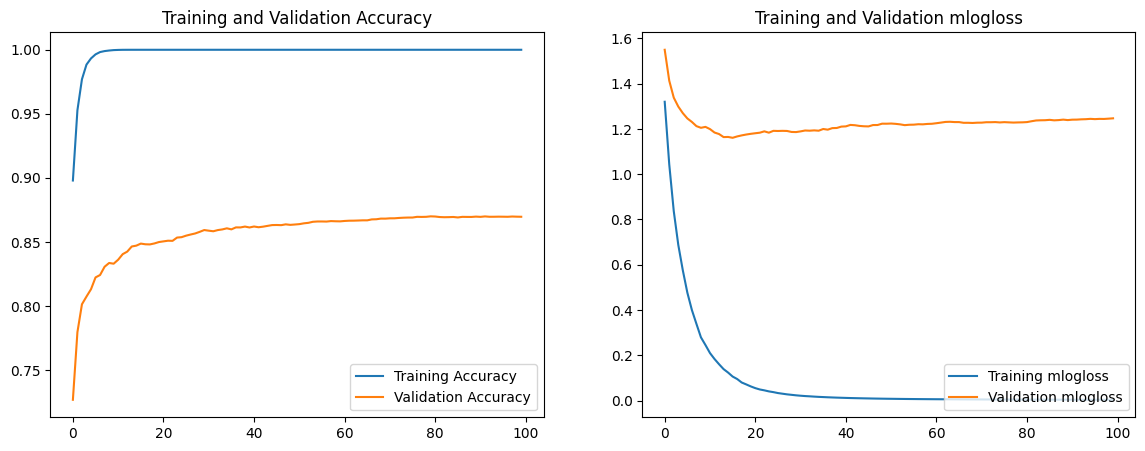

In [ ]:
# accuracy, loss 그래프

# retrieve performance metrics
results = xgb_clf_2.evals_result()

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['auc'], label='Training Accuracy')
plt.plot(results['validation_1']['auc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(results['validation_0']['mlogloss'], label='Training mlogloss')
plt.plot(results['validation_1']['mlogloss'], label='Validation mlogloss')
plt.legend(loc='lower right')
plt.title('Training and Validation mlogloss')

plt.show()

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

   cardboard       0.53      0.54      0.53        82
       paper       0.73      0.77      0.75       108
       glass       0.75      0.76      0.75        70
       metal       0.54      0.69      0.61        74
       trash       0.50      0.41      0.45        68
     plastic       0.77      0.34      0.48        29

    accuracy                           0.62       431
   macro avg       0.64      0.58      0.59       431
weighted avg       0.63      0.62      0.62       431



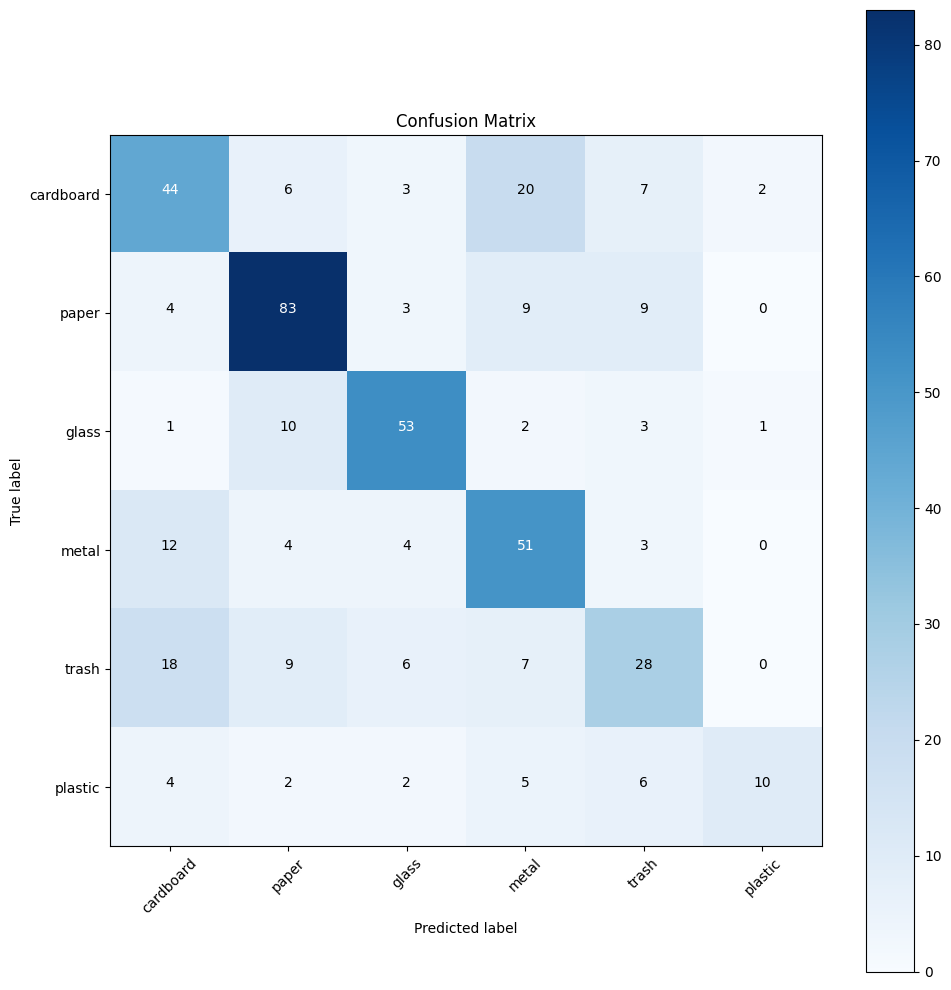

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


target_names = ['cardboard', 'paper', 'glass', 'metal', 'trash', 'plastic']

# Confusion Matrix
cm = confusion_matrix(Y_test, y_test_pred_2)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(Y_test, y_test_pred_2, target_names=target_names))

사용한 파일 제거

In [ ]:
'''
save_directory = '/content/drive/MyDrive/Colab_Notebooks/Data_driven_AI/input/augmentation_data/valid'

import shutil

shutil.rmtree(save_directory)
'''